**Haberman's Dataset:**
    Haberman Data is from a study on the survival of patients who had taken breast cancer surgery.
This survery was done between 1958 to 1970

key points :
1. year_of_suggery : In which year the suggery was done.
2. age : Age of patient when suggery was done.
3. axillary_nodes : number of positive auxillary node detected 

Results:
1. --1 means patient survived 5 years or longer 
2. --2 means patient died within 5 years of suggery.

**Objective : **
 Perform the EDA to find out the key features to distingiush the survival status of new patient for data. 

In [1]:
#import the libraries need for EDA for habermans data set.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [47]:
#read the data set and add the column headers
col_Names = ["age","year_of_suggery","axillary_nodes","survival_status"]
haberman = pd.read_csv('haberman.csv',names=col_Names);
print(haberman.shape)
print(haberman['survival_status'].value_counts())
#print(haberman.info())

#Map the values to 1 (survived) to yes and 2(died) as no
haberman['survival_status'] = haberman['survival_status'].map({1:'Yes', 2:'No'})

(306, 4)
1    225
2     81
Name: survival_status, dtype: int64


**Observations: **

1. The dataset has 306 patient information who had undergone the breast cancer suggery.
2. There are 3 features in haberman's dataset , one is age, year of suggery and number of axillary nodes
3. The results are survived or non survived and dataset indicates 1 as survived more than 5 years and died within 5 years.
2. 225 patients had survived above 5 years after the suggery.
3. 81 patients had died within 5 years after the suggery.
4. All the columns are interger data type  and not null values
5. This is an imbalanced dataset.

**Objective :**
Determine the number of features, classes and data-points in the dataset to perfore the EDA.

   

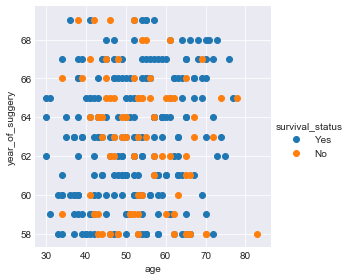

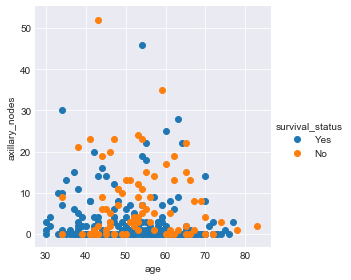

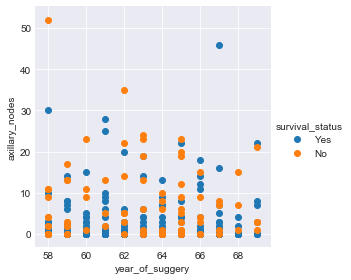

In [40]:
# There are 3 columns, combination would be 3C2 = 3
# scatter plot with age and year of suggery
sns.set_style("darkgrid");
sns.FacetGrid(haberman, hue ='survival_status', size =4)\
    .map( plt.scatter,'age','year_of_suggery')\
    .add_legend();

#scatter plot with age and axillary_nodes 
sns.FacetGrid(haberman, hue ='survival_status', size =4)\
    .map( plt.scatter,'age','axillary_nodes')\
    .add_legend();

#scatter plot with  year and axillary_nodes
sns.FacetGrid(haberman, hue ='survival_status', size =4)\
    .map( plt.scatter,'year_of_suggery','axillary_nodes')\
    .add_legend();

plt.show()

** Observation :** 
1.As per the above feature combination there is a overlap for survival status and non survival status and hard to classify lets see of for pair plots in the next and box plot and violin plot 

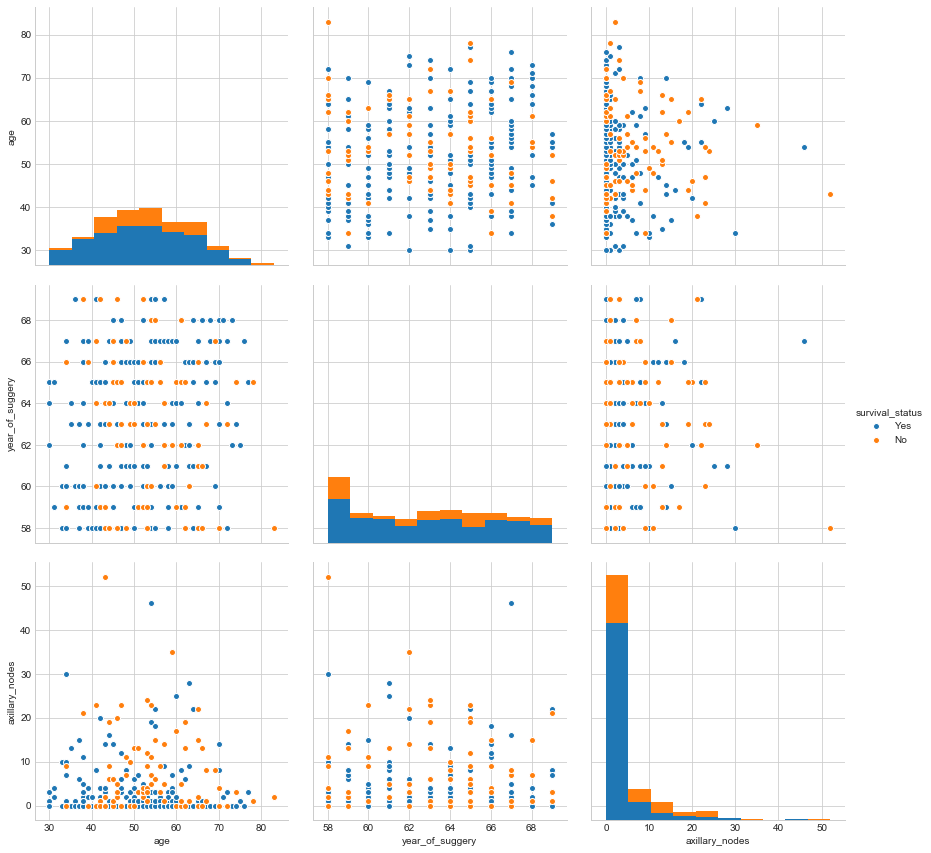

In [157]:
#pairplot bivariate analysis
plt.close()
sns.set_style('whitegrid')
sns.pairplot(haberman, hue ='survival_status', size=4)
plt.show()


**Observation:**
Based on the pair plot , year_of_suggery and axillary_nodes features can be classifed better than others feature.

In [51]:
# Objective is to looks for histograms and PDF and CDF for habermans data set for each feature to understand distributions



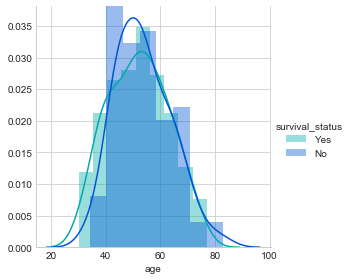

In [59]:
#Histograms, PDF and CDF univate analysis
import warnings 
warnings.filterwarnings('ignore');
sns.FacetGrid(haberman, hue ='survival_status', palette='winter_r' ,size=4)\
    .map(sns.distplot, "age")\
    .add_legend();
plt.show();

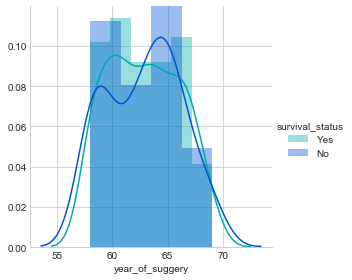

In [60]:
sns.FacetGrid(haberman, hue ='survival_status', palette='winter_r' ,size=4)\
    .map(sns.distplot, "year_of_suggery")\
    .add_legend();
plt.show()

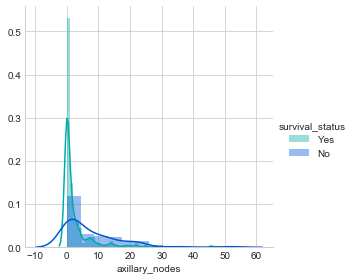

In [61]:
sns.FacetGrid(haberman, hue ='survival_status', palette='winter_r' ,size=4)\
    .map(sns.distplot, "axillary_nodes")\
    .add_legend();
plt.show()

Age :
[0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
[30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]

Year of suggery :
[0.20588235 0.09150327 0.08496732 0.0751634  0.09803922 0.10130719
 0.09150327 0.09150327 0.08169935 0.07843137]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]

axillary nodes :
[0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


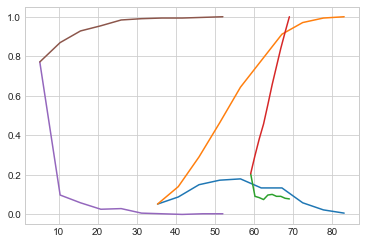

In [78]:
# see the CDF

print('Age :')
counts ,bin_edges = np.histogram(haberman['age'], bins=10, density =True)
pdf= counts/(sum(counts));
print(pdf);
print(bin_edges);
cdf=  np.cumsum(pdf);

plt.plot(bin_edges[1:],pdf);

plt.plot(bin_edges[1:],cdf);


print('\nYear of suggery :')
counts ,bin_edges = np.histogram(haberman['year_of_suggery'], bins=10, density =True)
pdf= counts/(sum(counts));
print(pdf);
print(bin_edges);
cdf=  np.cumsum(pdf);
plt.plot(bin_edges[1:],pdf);

plt.plot(bin_edges[1:],cdf);

print('\naxillary nodes :')
counts ,bin_edges = np.histogram(haberman['axillary_nodes'], bins=10, density =True)
pdf= counts/(sum(counts));
print(pdf);
print(bin_edges);
cdf=  np.cumsum(pdf);
plt.plot(bin_edges[1:],pdf);

plt.plot(bin_edges[1:],cdf);
plt.show()

**Observations :** 
    
    Based on PDF and CDF for each feature of the haberman dataset to see the spread of PDF for each point and CDF.
    

In [132]:
from statsmodels import robust
print('High Level stats for age :')
print("Mean", np.mean(haberman['age']))
print("Max Age:",np.max(haberman['age']))
print('Min Age:',np.min(haberman['age']))
print('standard deviation : ', np.std(haberman['age']))
print('Median Age:',np.median(haberman['age']))
print('Quantiles 0th ,25th, 50th,75th  ', np.percentile(haberman['age'],np.arange(0,100,25)));
print('90 percentile', np.percentile(haberman['age'],90))
print('Median abosulte deviation ', robust.mad(haberman['age']))


print('\nHigh Level stats for year of suggery :')
print("Mean", np.mean(haberman['year_of_suggery']))
print("Max Age:",np.max(haberman['year_of_suggery']))
print('Min Age:',np.min(haberman['year_of_suggery']))
print('standard deviation : ', np.std(haberman['year_of_suggery']))
print('Median Age:',np.median(haberman['year_of_suggery']))
print('Quantiles 0th ,25th, 50th,75th  ', np.percentile(haberman['year_of_suggery'],np.arange(0,100,25)));
print('90 percentile', np.percentile(haberman['year_of_suggery'],90))
print('Median abosulte deviation ', robust.mad(haberman['year_of_suggery']))

print('\nHigh Level stats for axillary_nodes:')
print("Mean", np.mean(haberman['axillary_nodes']))
print("Max Age:",np.max(haberman['axillary_nodes']))
print('Min Age:',np.min(haberman['axillary_nodes']))
print('standard deviation : ', np.std(haberman['axillary_nodes']))
print('Median Age:',np.median(haberman['axillary_nodes']))
print('Quantiles 0th ,25th, 50th,75th  ', np.percentile(haberman['axillary_nodes'],np.arange(0,100,25)));
print('90 percentile', np.percentile(haberman['axillary_nodes'],90))
print('Median abosulte deviation ', robust.mad(haberman['axillary_nodes']))

High Level stats for age :
Mean 52.45751633986928
Max Age: 83
Min Age: 30
standard deviation :  10.78578520363183
Median Age: 52.0
Quantiles 0th ,25th, 50th,75th   [30.   44.   52.   60.75]
90 percentile 67.0
Median abosulte deviation  11.860817748044816

High Level stats for year of suggery :
Mean 62.85294117647059
Max Age: 69
Min Age: 58
standard deviation :  3.244090833563246
Median Age: 63.0
Quantiles 0th ,25th, 50th,75th   [58.   60.   63.   65.75]
90 percentile 67.0
Median abosulte deviation  4.447806655516806

High Level stats for axillary_nodes:
Mean 4.026143790849673
Max Age: 52
Min Age: 0
standard deviation :  7.177896092811152
Median Age: 1.0
Quantiles 0th ,25th, 50th,75th   [0. 0. 1. 4.]
90 percentile 13.0
Median abosulte deviation  1.482602218505602


**Observation :** 

Age:
1. Min and maxium age of patients undergone the treatement is 30 and 83
2. Average age of patients undergone the treatement is 52 with deviation between the patient is 11
3. 50 percent of patients had suggery between Age 44 and 60.
4. 90 percent of patients had suggery before age 67
    
Year of suggery:
1. year between the suggery was done is 58 to 69
2. 50 percent of patients had suggery between Age 60 and 65.
3. 90 percent of patients had suggery between 58 and 67

Axilliary Nodes:
1. Min and maxium axillary node of patients undergone the treatement is 0 and 52
2.  Average axillary nodes of patients undergone the treatement is 4.
3. 50 percent of patients had suggery with axillary nodes between 0 and 4.
4. 90 percent of patients had suggery with axillary nodes below 13 

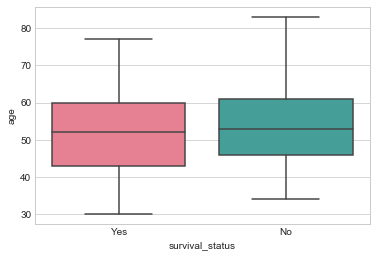

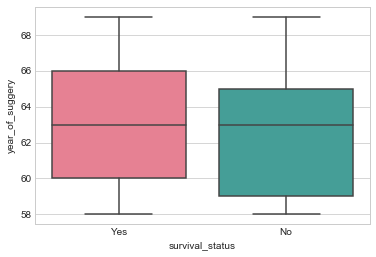

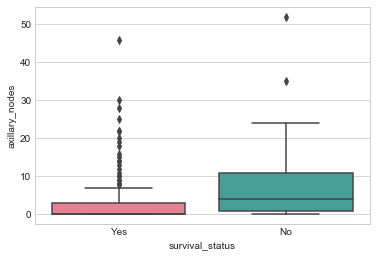

In [149]:
#box plots  univate analysis

sns.boxplot(x=haberman['survival_status'], y = haberman['age'], data =haberman, palette='husl')
plt.show()
sns.boxplot(x=haberman['survival_status'], y = haberman['year_of_suggery'], data =haberman, palette='husl')
plt.show()
sns.boxplot(x=haberman['survival_status'], y = haberman['axillary_nodes'], data =haberman, palette='husl')

In [143]:
#violin plot univate analysis

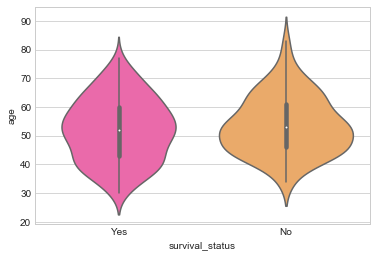

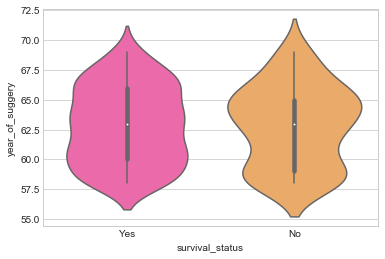

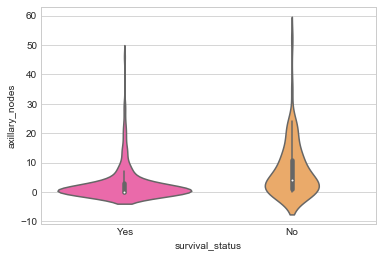

In [152]:
sns.violinplot(x=haberman['survival_status'], y = haberman['age'],palette='spring')
plt.show()
sns.violinplot(x=haberman['survival_status'], y = haberman['year_of_suggery'],palette='spring')
plt.show()
sns.violinplot(x=haberman['survival_status'], y = haberman['axillary_nodes'], palette='spring')
plt.show()

**Observations:**
1.  Patients with 0 to 5 has higher chance of survival based on the univarity analysis of the PDF plot.


Mulitvariate  Analysis using countor plots, based on of pairplots year_of_suggery and axillary_nodes are little better to classify the dataset



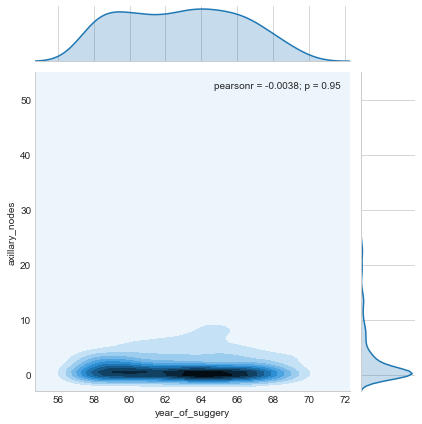

In [154]:
sns.jointplot(x=haberman['year_of_suggery'], y='axillary_nodes' , data =haberman, kind='kde');

Observation :
1. Imbalanced dataset.
2. Year_of_suggery and axillary nodes provide little better classfication than other features.